# El tratamiento de las varibles categoricas

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('../python-ml-course-master/python-ml-course-master/datasets/ecom-expense/Ecom Expense.csv')

In [3]:
df.head() 

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [4]:
dummy_gender = pd.get_dummies(df['Gender'], prefix='Gender')
dummy_city_tier = pd.get_dummies(df['City Tier'], prefix='City')

In [5]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0


In [6]:
dummy_city_tier.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [7]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [8]:
df_new = df[column_names].join(dummy_gender)

In [9]:
column_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [10]:
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [11]:
feature_cols = ['Monthly Income', 'Transaction Time',
                'Gender_Female','Gender_Male',
                'City_Tier 1','City_Tier 2','City_Tier 3',
               'Record']

In [12]:
X = df_new[feature_cols]
y = df_new['Total Spend']

In [13]:
lm = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
print(lm.intercept_)
print(lm.coef_)

-79.4171303013718
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [15]:
list(zip(feature_cols, lm.coef_ ))

[('Monthly Income', 0.14753898049205738),
 ('Transaction Time', 0.15494612549589634),
 ('Gender_Female', -131.02501325554624),
 ('Gender_Male', 131.02501325554607),
 ('City_Tier 1', 76.76432601049513),
 ('City_Tier 2', 55.1389743092325),
 ('City_Tier 3', -131.9033003197277),
 ('Record', 772.2334457445645)]

In [16]:
lm.score(X,y)

0.9179923586131016

In [17]:
df_new['Predict']= -79.4171303013718 +df_new['Monthly Income']* 0.14753898049205738+df_new['Transaction Time']*0.15494612549589634+df_new['Gender_Female']* (-131.02501325554624) + df_new['Gender_Male']* 131.02501325554607+df_new['City_Tier 1']* 76.76432601049513+df_new['City_Tier 2']* 55.1389743092325+df_new['City_Tier 3']* (-131.9033003197277)+df_new['Record']* 772.2334457445645

In [18]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,Predict
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [19]:
SSD = np.sum((df_new['Predict']-df_new['Total Spend'])**2)
SSD

1517733985.340816

In [20]:
RSE = np.sqrt(SSD/(len(df_new)-len(feature_cols)-1))
RSE

803.1318809818165

In [21]:
sales_mean = np.mean(df_new['Total Spend'])
sales_mean

6163.176415976714

In [22]:
error = RSE/sales_mean
error*100

13.031135680294161

# Eliminar variables dummuy redundantes

In [23]:
dummy_gender = pd.get_dummies(df['Gender'], prefix='Gender').iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [24]:
dummy_city_tier = pd.get_dummies(df['City Tier'], prefix='City').iloc[:,1:]
dummy_city_tier.head()

,City_Tier 2,City_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [25]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [26]:
feature_cols = feature_cols = ['Monthly Income', 
                'Transaction Time',
                'Gender_Male',
               'City_Tier 2','City_Tier 3',
               'Record']

In [27]:
X = df_new[feature_cols]
y = df_new['Total Spend']
lm  = LinearRegression()
lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
print(lm.intercept_)

-133.67781754642238


In [29]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205744),
 ('Transaction Time', 0.1549461254959002),
 ('Gender_Male', 262.0500265110948),
 ('City_Tier 2', -21.62535170126276),
 ('City_Tier 3', -208.66762633022296),
 ('Record', 772.2334457445636)]

In [30]:
lm.score(X,y)

0.9179923586131016

In [31]:
df_new['prediction'] = lm.predict(pd.DataFrame(df_new[feature_cols]))

In [32]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3,prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0,3581.980335


# Transformacion de variables para conseguir una realacion no lineal

In [33]:
import pandas as pd

In [34]:
data_auto = pd.read_csv('../python-ml-course-master/python-ml-course-master/datasets/auto/auto-mpg.csv')

In [35]:
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [36]:
data_auto.shape

(406, 9)

In [37]:
data_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       406 non-null int64
displacement    406 non-null float64
horsepower      400 non-null float64
weight          406 non-null int64
acceleration    406 non-null float64
model year      406 non-null int64
origin          406 non-null int64
car name        406 non-null object
dtypes: float64(4), int64(4), object(1)
memory usage: 28.6+ KB


In [38]:
mpg_nonull=data_auto['mpg'].fillna(data_auto['mpg'].mean())
horse_power = data_auto['horsepower']

In [39]:
data_auto = data_auto.drop(['mpg'], axis=1)

In [40]:
data_auto.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,8,302.0,140.0,3449,10.5,70,1,ford torino


In [41]:
mpg_nonull = pd.DataFrame(mpg_nonull)
data_auto = data_auto.join([mpg_nonull])

In [42]:
data_auto.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg
0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449,10.5,70,1,ford torino,17.0


In [43]:
data_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 9 columns):
cylinders       406 non-null int64
displacement    406 non-null float64
horsepower      400 non-null float64
weight          406 non-null int64
acceleration    406 non-null float64
model year      406 non-null int64
origin          406 non-null int64
car name        406 non-null object
mpg             406 non-null float64
dtypes: float64(4), int64(4), object(1)
memory usage: 28.6+ KB


In [44]:
import matplotlib.pyplot as plt

Text(0.5,1,'Consumo')

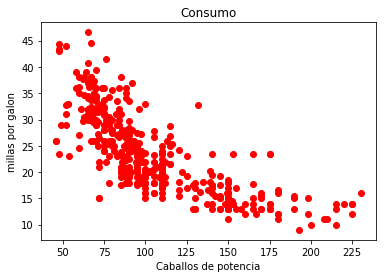

In [45]:
%matplotlib inline

plt.plot(data_auto['horsepower'], data_auto['mpg'], 'ro')
plt.xlabel('Caballos de potencia')
plt.ylabel('millas por galon')
plt.title('Consumo')

# Modelo de regresion lineal

* mpg = b + a(horsepower)

In [46]:
X = data_auto['horsepower'].fillna(data_auto['horsepower'].mean())
y = data_auto['mpg']
X_data = X[:, np.newaxis]

In [47]:
lm = LinearRegression()
lm.fit(X_data,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

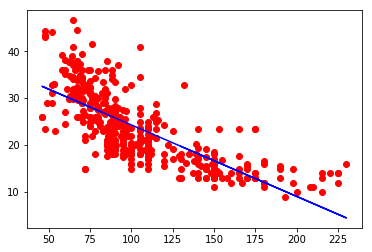

In [48]:
%matplotlib inline
plt.plot(X,y , 'ro')
plt.plot(X,lm.predict(X_data), color='blue')

In [49]:
lm.score(X_data, y)

0.574653340645025

In [50]:
SSD = np.sum((y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD / (len(X_data)-1))
y_mean = np.mean(y)
error = RSE/y_mean
SSD,RSE,y_mean,error

(10315.75196006092, 5.046879480825511, 23.51457286432162, 0.21462773361633458)

#  Modelo de regresion cuadratico

* mpg = b + a(horsepower)^2

In [51]:
X_data = X**2
X_data = X_data[:, np.newaxis]

In [52]:
lm = LinearRegression()
lm.fit(X_data,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
lm.score(X_data,y)

0.4849887034823205

In [54]:
SSD = np.sum((y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD / (len(X_data)-1))
y_mean = np.mean(y)
error = RSE/y_mean
SSD,RSE,y_mean,error

(12490.350340501926, 5.553410772769817, 23.51457286432162, 0.236168898529981)

 #  Modelo de regresion cuadratico

* mpg = a +b(horsepower)+ c(horsepower)^2 


In [55]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [56]:
poly = PolynomialFeatures(degree=2)

In [57]:
X_data = poly.fit_transform(X[:, np.newaxis])

In [58]:
lm = linear_model.LinearRegression()
lm.fit(X_data,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [59]:
lm.score(X_data,y)

0.6439066584257469

In [60]:
lm.intercept_

55.02619244708036

In [61]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

#### mpg = 55.0261 -0.4340431(horsepower) +  0.00112615(horsepower)^2

In [62]:
def regression_Validation(X_data,y, y_pred):
    SSD = np.sum((y - y_pred)**2)
    RSE = np.sqrt(SSD / (len(X_data)-1))
    y_mean = np.mean(y)
    error = RSE/y_mean
    print('SSD: '+str(SSD)+ '\nRSE: '+str(RSE)+'\ny_mean: '+str(y_mean)
          +'\nERROR: '+str(error*100))

In [64]:
for d in range(2,6):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[:, np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data,y)
    print('Regresion de grado '+ str(d))
    print(lm.intercept_)
    print(lm.coef_)
    print('R2: ' + str(lm.score(X_data,y)))
    regression_Validation(X_data,y, lm.predict(X_data))
    print('\n')

Regresion de grado 2
55.02619244708036
[ 0.         -0.43404318  0.00112615]
R2: 0.6439066584257469
SSD: 8636.180643524502
RSE: 4.61778115803654
y_mean: 23.51457286432162
ERROR: 19.63795466190689


Regresion de grado 3
58.44877411191831
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
R2: 0.6444678885560744
SSD: 8622.56936742855
RSE: 4.614140736300908
y_mean: 23.51457286432162
ERROR: 19.622473106036676


Regresion de grado 4
40.09664385351243
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]
R2: 0.6467674189704502
SSD: 8566.799832491353
RSE: 4.5991947315797574
y_mean: 23.51457286432162
ERROR: 19.55891250126878


Regresion de grado 5
-40.69384659973697
[ 0.00000000e+00  4.00021432e+00 -7.54801920e-02  6.19621368e-04
 -2.36220932e-06  3.41983017e-09]
R2: 0.6547512491514693
SSD: 8373.171388427545
RSE: 4.54692173402805
y_mean: 23.51457286432162
ERROR: 19.336612067179157




# El problema de los outliers

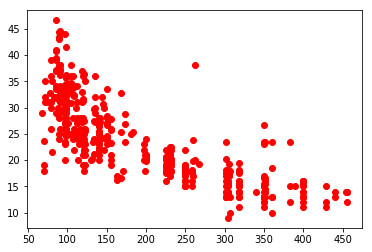

In [67]:
plt.plot(data_auto['displacement'], data_auto['mpg'], 'ro')

In [71]:
lm = LinearRegression()
X = data_auto['displacement'].fillna(data_auto['displacement'].mean())
X = X[:,np.newaxis]

y = data_auto['mpg'].fillna(data_auto['mpg'].mean())

lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
lm.score(X,y)

0.6261049762826918

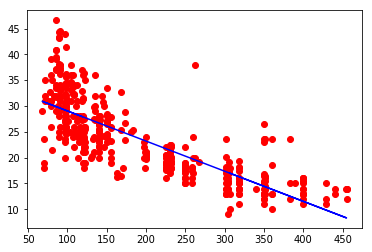

In [73]:
%matplotlib inline
plt.plot(X,y , 'ro')
plt.plot(X,lm.predict(X), color='blue')

In [76]:
data_auto[(data_auto['displacement']>250) & (data_auto['mpg']>35)]

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg
395,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel),38.0


In [77]:
data_auto[(data_auto['displacement']>300) & (data_auto['mpg']>20)]

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,mpg
11,8,350.0,165.0,4142,11.5,70,1,chevrolet chevelle concours (sw),23.514573
12,8,351.0,153.0,4034,11.0,70,1,ford torino (sw),23.514573
13,8,383.0,175.0,4166,10.5,70,1,plymouth satellite (sw),23.514573
14,8,360.0,175.0,3850,11.0,70,1,amc rebel sst (sw),23.514573
17,8,302.0,140.0,3353,8.0,70,1,ford mustang boss 302,23.514573
258,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia,20.200000
305,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado,23.000000
372,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls,26.600000


In [80]:
data_auto_clean = data_auto.drop([11,12,13,14,17,258,305,372])

In [81]:
lm = LinearRegression()
X = data_auto_clean['displacement'].fillna(data_auto_clean['displacement'].mean())
X = X[:,np.newaxis]

y = data_auto_clean['mpg'].fillna(data_auto_clean['mpg'].mean())

lm.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [83]:
lm.score(X,y)

0.6541238347296505

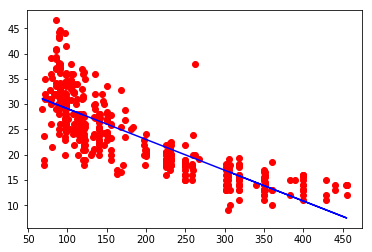

In [84]:
%matplotlib inline
plt.plot(X,y , 'ro')
plt.plot(X,lm.predict(X), color='blue')